<a href="https://colab.research.google.com/github/bnsreenu/python_for_image_processing_APEER/blob/master/tutorial109_regression_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/vyX2_XRHO9g

In [ ]:
"""
Boston housing dataset: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
Data has white spaces, not commas.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's


"""

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# load data and arrange into Pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/housing_data/housing_data_for_regression.csv", delim_whitespace=True, header=None)

print(df.head())

        0     1     2   3      4      5   ...  8      9     10      11    12    13
0  0.00632  18.0  2.31   0  0.538  6.575  ...   1  296.0  15.3  396.90  4.98  24.0
1  0.02731   0.0  7.07   0  0.469  6.421  ...   2  242.0  17.8  396.90  9.14  21.6
2  0.02729   0.0  7.07   0  0.469  7.185  ...   2  242.0  17.8  392.83  4.03  34.7
3  0.03237   0.0  2.18   0  0.458  6.998  ...   3  222.0  18.7  394.63  2.94  33.4
4  0.06905   0.0  2.18   0  0.458  7.147  ...   3  222.0  18.7  396.90  5.33  36.2

[5 rows x 14 columns]


In [ ]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']


df.columns = feature_names
print(df.head())

#df = df.rename(columns={'MEDV': 'PRICE'})
print(df.describe().T)

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]
         count        mean         std  ...        50%         75%       max
CRIM     506.0    3.613524    8.601545  ...    0.25651    3.677082   88.9762
ZN       506.0   11.363636   23.322453  ...    0.00000   12.500000  100.0000
INDUS    506.0   11.136779    6.860353  ...    9.69000   18.100000   27.7400
CHAS     506.0    0.069170    0.253994  ...    0.00000    0.000000    1.0000
NOX      506.0    0.554695    0.115878  ...    0.53800    0.624000    0.8710
RM       506.0    6.284634    0.702

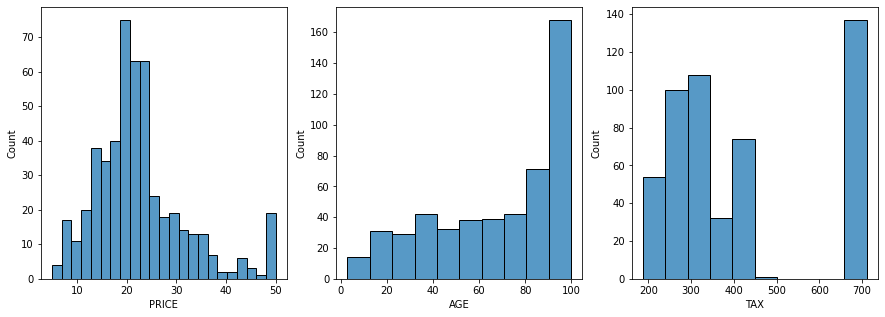

In [ ]:
fig, ax =plt.subplots(1,3, figsize=(15, 5))
sns.histplot(df['PRICE'], ax=ax[0])
sns.histplot(df['AGE'], ax=ax[1])
sns.histplot(df['TAX'], ax=ax[2])

fig.show()

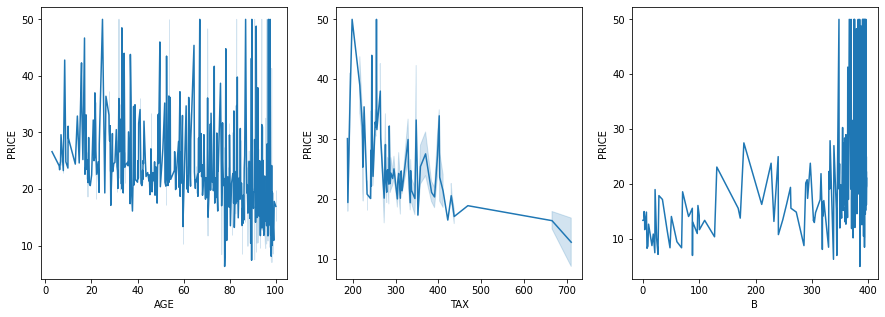

In [ ]:
#Understand the data further. 
fig, ax =plt.subplots(1,3, figsize=(15, 5))
sns.lineplot(x=df['AGE'], y=df['PRICE'], ax=ax[0])
sns.lineplot(x=df['TAX'], y=df['PRICE'], ax=ax[1])
sns.lineplot(x=df['B'], y=df['PRICE'], ax=ax[2])


fig.show()

In [ ]:
#Any strong correlation between attributes?
corr = df.corr()
corr_unstacked = corr.unstack()
corr_unstacked_sorted = corr_unstacked.sort_values(kind="quicksort", ascending=False)
corr_df=pd.Series.to_frame(corr_unstacked_sorted, name='correlation')  #Convert Series to DataFrame and name correlation column accordingly. 
high_corr_features =  corr_df[corr_df.correlation != 1]  #Remove all 1s that correspond to self correlation
print(high_corr_features.head(30))

             correlation
TAX   RAD       0.910228
RAD   TAX       0.910228
INDUS NOX       0.763651
NOX   INDUS     0.763651
      AGE       0.731470
AGE   NOX       0.731470
TAX   INDUS     0.720760
INDUS TAX       0.720760
PRICE RM        0.695360
RM    PRICE     0.695360
TAX   NOX       0.668023
NOX   TAX       0.668023
DIS   ZN        0.664408
ZN    DIS       0.664408
INDUS AGE       0.644779
AGE   INDUS     0.644779
CRIM  RAD       0.625505
RAD   CRIM      0.625505
NOX   RAD       0.611441
RAD   NOX       0.611441
INDUS LSTAT     0.603800
LSTAT INDUS     0.603800
      AGE       0.602339
AGE   LSTAT     0.602339
INDUS RAD       0.595129
RAD   INDUS     0.595129
NOX   LSTAT     0.590879
LSTAT NOX       0.590879
TAX   CRIM      0.582764
CRIM  TAX       0.582764


In [ ]:
print(df.isnull().sum())
#df = df.dropna()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


In [ ]:
#Split into features and target (Price)
X = df.drop('PRICE', axis = 1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)



In [ ]:
#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# define the model
#Experiment with deeper and wider networks
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs =100, validation_data=(X_test_scaled, y_test))


Epoch 1/100
13/13 [==============================] - 1s 24ms/step - loss: 585.5664 - mae: 22.0591 - val_loss: 430.4849 - val_mae: 19.0240
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 447.1653 - mae: 18.9628 - val_loss: 330.0401 - val_mae: 16.3608
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 333.7310 - mae: 15.6798 - val_loss: 213.9000 - val_mae: 12.9314
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 195.6411 - mae: 11.8140 - val_loss: 109.5198 - val_mae: 8.7879
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 114.8703 - mae: 8.0923 - val_loss: 55.7692 - val_mae: 6.0671
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 59.2307 - mae: 5.8705 - val_loss: 38.1550 - val_mae: 4.9746
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 45.7845 - mae: 5.1300 - val_loss: 28.8134 - val_mae: 4.3029
Epoch 8/100
13/13 [==============================] -

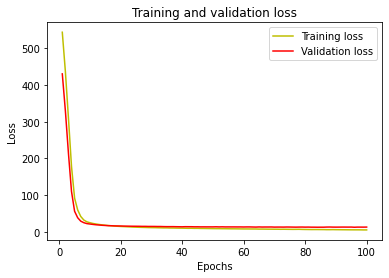

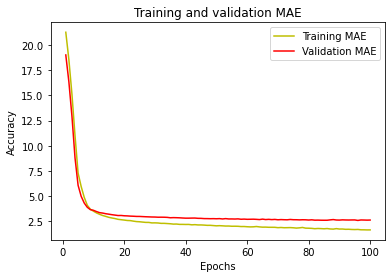

In [ ]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [[20.064781 ]
 [20.190065 ]
 [19.327238 ]
 [21.625889 ]
 [12.7529125]]
Real values are:  498    21.2
94     20.6
150    21.5
221    21.7
423    13.4
Name: PRICE, dtype: float64


In [ ]:
#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 3ms/step - loss: 12.6274 - mae: 2.6121
Mean squared error from neural net:  12.627412796020508
Mean absolute error from neural net:  2.6121182441711426


In [ ]:
#Linear regression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  16.49535197593167
Mean absolute error from linear regression:  3.055894153890959


In [ ]:
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30)
model.fit(X_train_scaled, y_train)

y_pred_RF = model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

#Feature ranking...
import pandas as pd
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Mean squared error using Random Forest:  12.251427450980392
Mean absolute error Using Random Forest:  2.382614379084967
LSTAT      0.479179
RM         0.337377
DIS        0.065498
CRIM       0.037599
NOX        0.019502
PTRATIO    0.014158
TAX        0.012761
B          0.012196
AGE        0.010441
INDUS      0.005591
RAD        0.003762
ZN         0.001591
CHAS       0.000345
dtype: float64
